#All relevant Imports

In [ ]:

!pip install yfinance

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from statsmodels.tsa.stattools import adfuller

# Setting up the visualization style
sns.set_style("darkgrid")
plt.rcParams["figure.figsize"] = (12, 6)


In [ ]:
stock_ticker = "RELIANCE.NS"
index_ticker = "^NSEI"

end_date = datetime.today().strftime('%Y-%m-%d')
start_date = (datetime.today() - timedelta(days=10*365)).strftime('%Y-%m-%d')

stock_data = yf.download(stock_ticker, start=start_date, end=end_date)
index_data = yf.download(index_ticker, start=start_date, end=end_date)

# Display basic information
print(stock_data.info())
print(index_data.info())


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2466 entries, 2015-02-02 to 2025-01-28
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   (Close, RELIANCE.NS)   2466 non-null   float64
 1   (High, RELIANCE.NS)    2466 non-null   float64
 2   (Low, RELIANCE.NS)     2466 non-null   float64
 3   (Open, RELIANCE.NS)    2466 non-null   float64
 4   (Volume, RELIANCE.NS)  2466 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 115.6 KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2459 entries, 2015-02-02 to 2025-01-28
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   (Close, ^NSEI)   2459 non-null   float64
 1   (High, ^NSEI)    2459 non-null   float64
 2   (Low, ^NSEI)     2459 non-null   float64
 3   (Open, ^NSEI)    2459 non-null   float64
 4   (Volume, ^NSEI)  2459 non-null   int64  
dtypes: f

#Data Cleaning

In [ ]:
# missing values
print("Missing values in Stock Data:\n", stock_data.isnull().sum())
print("Missing values in Nifty Data:\n", index_data.isnull().sum())

# Forward-fill missing values to maintain the continuity in time series
stock_data.fillna(method='ffill', inplace=True)
index_data.fillna(method='ffill', inplace=True)

stock_prices = stock_data[['Close']]
index_prices = index_data[['Close']]

stock_prices.rename(columns={'Close': f'{stock_ticker}_Close'}, inplace=True)
index_prices.rename(columns={'Close': 'Nifty50_Close'}, inplace=True)

stock_prices.reset_index(inplace=True)
index_prices.reset_index(inplace=True)

merged_data = pd.merge(stock_prices, index_prices, on='Date', how='inner')

merged_data.head()


Missing values in Stock Data:
 Price   Ticker     
Close   RELIANCE.NS    0
High    RELIANCE.NS    0
Low     RELIANCE.NS    0
Open    RELIANCE.NS    0
Volume  RELIANCE.NS    0
dtype: int64
Missing values in Nifty Data:
 Price   Ticker
Close   ^NSEI     0
High    ^NSEI     0
Low     ^NSEI     0
Open    ^NSEI     0
Volume  ^NSEI     0
dtype: int64


<ipython-input-4-ccf703ed05d1>:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  stock_data.fillna(method='ffill', inplace=True)
<ipython-input-4-ccf703ed05d1>:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  index_data.fillna(method='ffill', inplace=True)
<ipython-input-4-ccf703ed05d1>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_prices.rename(columns={'Close': f'{stock_ticker}_Close'}, inplace=True)
<ipython-input-4-ccf703ed05d1>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

Price,Date,RELIANCE.NS_Close,Nifty50_Close
Ticker,,RELIANCE.NS,^NSEI
0,2015-02-02,185.150330,8797.400391
1,2015-02-03,191.175552,8756.549805
2,2015-02-04,189.381241,8723.700195
3,2015-02-05,188.341370,8711.700195
4,2015-02-06,185.527573,8661.049805


#EDA(Exploratory Data Analysis)

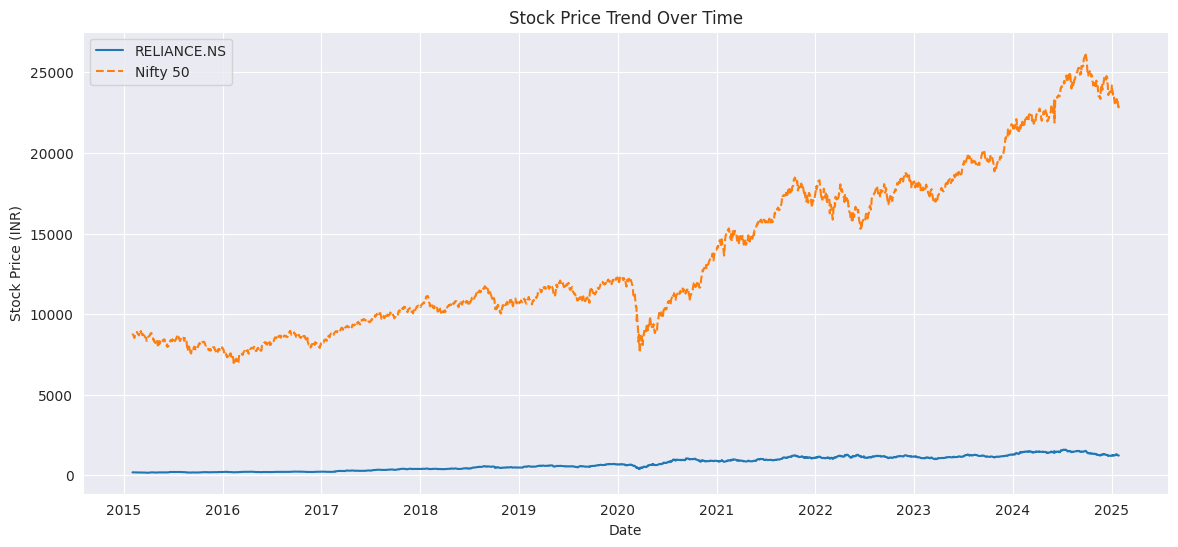

In [ ]:
plt.figure(figsize=(14, 6))
plt.plot(merged_data['Date'], merged_data[f'{stock_ticker}_Close'], label=stock_ticker)
plt.plot(merged_data['Date'], merged_data['Nifty50_Close'], label="Nifty 50", linestyle="dashed")
plt.xlabel('Date')
plt.ylabel('Stock Price (INR)')
plt.title('Stock Price Trend Over Time')
plt.legend()
plt.show()


In [ ]:
print("Stock Data Summary:\n", stock_prices.describe())
print("Nifty 50 Summary:\n", index_prices.describe())


Stock Data Summary:
 Price                            Date RELIANCE.NS_Close
Ticker                                      RELIANCE.NS
count                            2466       2466.000000
mean    2020-01-31 19:48:54.306569216        738.318489
min               2015-02-02 00:00:00        165.310974
25%               2017-08-02 06:00:00        340.569916
50%               2020-02-04 12:00:00        650.777100
75%               2022-07-27 18:00:00       1134.195618
max               2025-01-28 00:00:00       1595.484985
std                               NaN        424.348005
Nifty 50 Summary:
 Price                            Date Nifty50_Close
Ticker                                        ^NSEI
count                            2459   2459.000000
mean    2020-02-03 01:17:17.982919936  13627.451162
min               2015-02-02 00:00:00   6970.600098
25%               2017-08-03 12:00:00   9523.325195
50%               2020-02-07 00:00:00  11582.349609
75%               2022-07-30 12:00:0

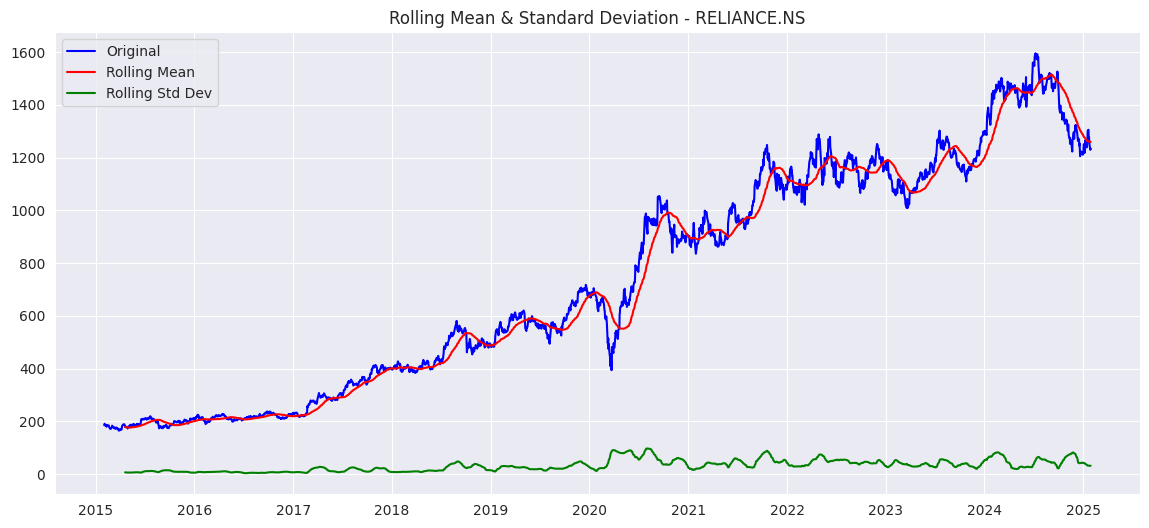

In [ ]:
window = 50 # taking rolling window of 50

plt.figure(figsize=(14,6))
plt.plot(merged_data['Date'], merged_data[f'{stock_ticker}_Close'], label="Original", color="blue")
plt.plot(merged_data['Date'], merged_data[f'{stock_ticker}_Close'].rolling(window=window).mean(), label="Rolling Mean", color="red")
plt.plot(merged_data['Date'], merged_data[f'{stock_ticker}_Close'].rolling(window=window).std(), label="Rolling Std Dev", color="green")
plt.title(f'Rolling Mean & Standard Deviation - {stock_ticker}')
plt.legend()
plt.show()


#Stationarity Check

In [ ]:
def adf_test(series, title=''):
    """
    Perform Augmented Dickey-Fuller Test.
    """
    print(f'ADF Test for {title}')
    result = adfuller(series.dropna(), autolag='AIC')
    labels = ['Test Statistic', 'p-value', '# Lags Used', 'Number of Observations Used']
    out = pd.Series(result[0:4], index=labels)

    for key, value in result[4].items():
        out[f'Critical Value ({key})'] = value

    print(out)

    # Conclusion
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis (H0), the data is stationary.")
    else:
        print("Weak evidence against H0, the series is non-stationary.")

# Perform ADF Test on Stock Data
adf_test(merged_data[f'{stock_ticker}_Close'], title=f'{stock_ticker} Closing Price')

# Perform ADF Test on Nifty 50 Data
adf_test(merged_data['Nifty50_Close'], title="Nifty 50 Closing Price")


ADF Test for RELIANCE.NS Closing Price
Test Statistic                   -0.862418
p-value                           0.800097
# Lags Used                       3.000000
Number of Observations Used    2455.000000
Critical Value (1%)              -3.433016
Critical Value (5%)              -2.862718
Critical Value (10%)             -2.567397
dtype: float64
Weak evidence against H0, the series is non-stationary.
ADF Test for Nifty 50 Closing Price
Test Statistic                    0.261499
p-value                           0.975507
# Lags Used                       0.000000
Number of Observations Used    2458.000000
Critical Value (1%)              -3.433013
Critical Value (5%)              -2.862717
Critical Value (10%)             -2.567396
dtype: float64
Weak evidence against H0, the series is non-stationary.


#ARIMA MODELLING

In [ ]:
# First-order differencing
merged_data['Stock_Diff_1'] = merged_data[f'{stock_ticker}_Close'].diff()

# Second-order differencing
merged_data['Stock_Diff_2'] = merged_data['Stock_Diff_1'].diff()

# Perform ADF test again on first-order differencing
print("\nADF Test for First Order Differencing:")
adf_test(merged_data['Stock_Diff_1'].dropna(), title=f'{stock_ticker} First Differenced')

# Perform ADF test again on second-order differencing
print("\nADF Test for Second Order Differencing:")
adf_test(merged_data['Stock_Diff_2'].dropna(), title=f'{stock_ticker} Second Differenced')



ADF Test for First Order Differencing:
ADF Test for RELIANCE.NS First Differenced
Test Statistic                  -29.862172
p-value                           0.000000
# Lags Used                       2.000000
Number of Observations Used    2455.000000
Critical Value (1%)              -3.433016
Critical Value (5%)              -2.862718
Critical Value (10%)             -2.567397
dtype: float64
Strong evidence against the null hypothesis (H0), the data is stationary.

ADF Test for Second Order Differencing:
ADF Test for RELIANCE.NS Second Differenced
Test Statistic                -1.721819e+01
p-value                        6.304885e-30
# Lags Used                    2.500000e+01
Number of Observations Used    2.431000e+03
Critical Value (1%)           -3.433043e+00
Critical Value (5%)           -2.862730e+00
Critical Value (10%)          -2.567403e+00
dtype: float64
Strong evidence against the null hypothesis (H0), the data is stationary.


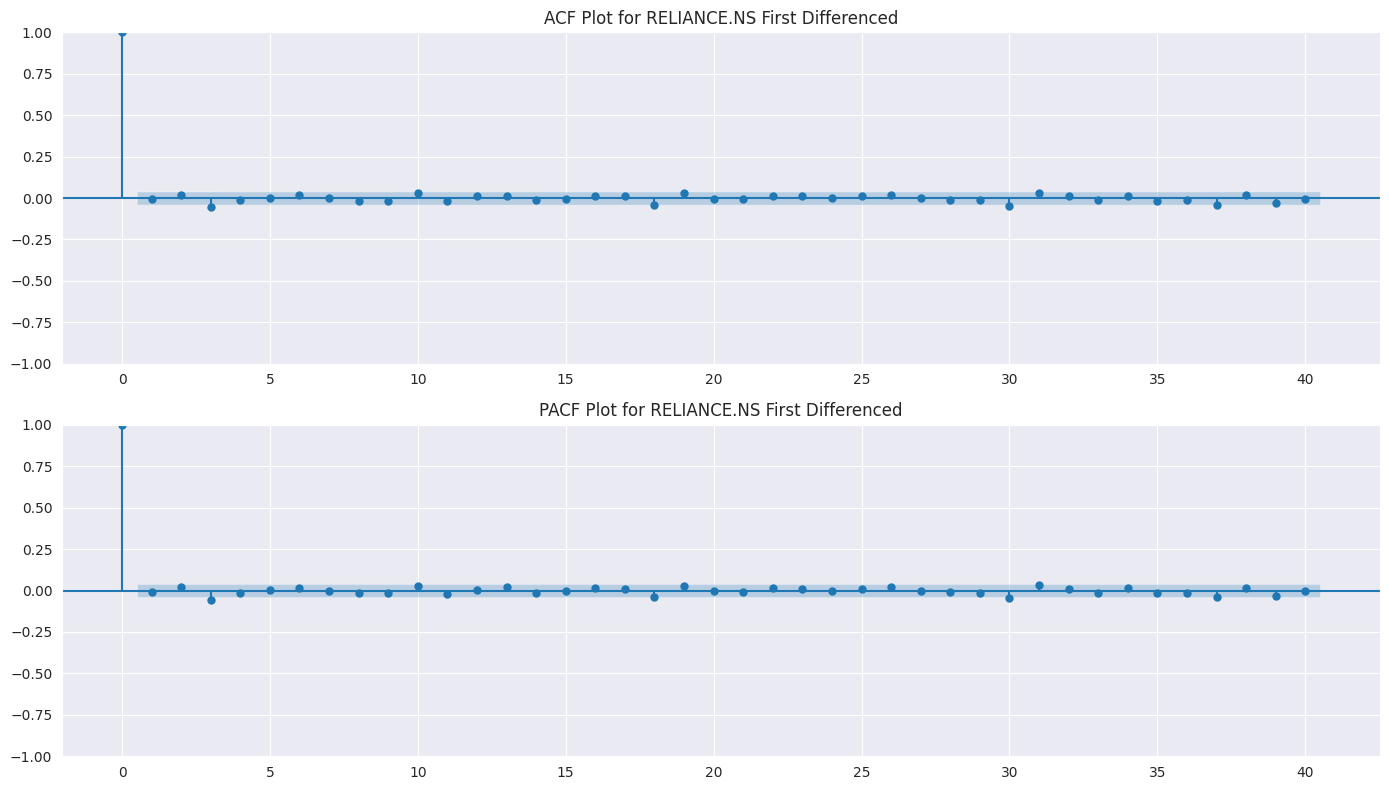

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF for first-order differenced data
fig, ax = plt.subplots(2, 1, figsize=(14, 8))

plot_acf(merged_data['Stock_Diff_1'].dropna(), lags=40, ax=ax[0])
ax[0].set_title(f'ACF Plot for {stock_ticker} First Differenced')

plot_pacf(merged_data['Stock_Diff_1'].dropna(), lags=40, ax=ax[1])
ax[1].set_title(f'PACF Plot for {stock_ticker} First Differenced')

plt.tight_layout()
plt.show()


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Define ARIMA model
p, d, q = 1, 1, 1
arima_model = ARIMA(merged_data[f'{stock_ticker}_Close'], order=(p, d, q))
arima_result = arima_model.fit()

print(arima_result.summary())


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:            RELIANCE.NS   No. Observations:                 2459
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -9880.047
Date:                Wed, 29 Jan 2025   AIC                          19766.094
Time:                        17:02:45   BIC                          19783.515
Sample:                             0   HQIC                         19772.424
                               - 2459                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8301      0.119     -6.956      0.000      -1.064      -0.596
ma.L1          0.8096      0.124      6.504      0.000       0.566       1.054
sigma2       181.4915      2.427     74.777      0.0

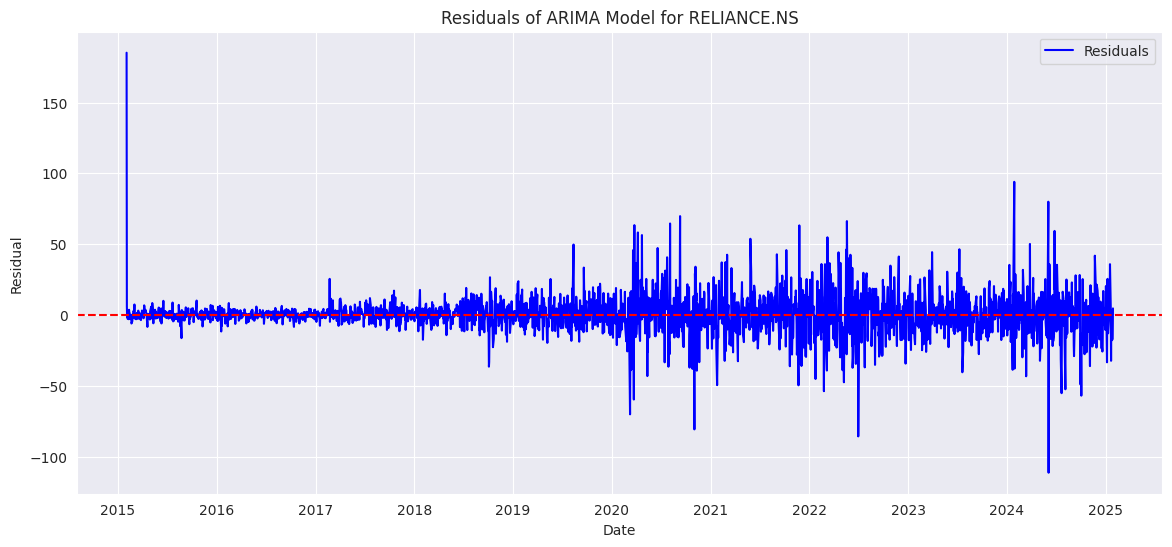

In [ ]:
# Extract residuals
merged_data['ARIMA_Residuals'] = arima_result.resid

# Plot ARIMA residuals
plt.figure(figsize=(14,6))
plt.plot(merged_data['Date'], merged_data['ARIMA_Residuals'], label='Residuals', color='blue')
plt.axhline(y=0, color='red', linestyle='dashed')
plt.xlabel("Date")
plt.ylabel("Residual")
plt.title(f"Residuals of ARIMA Model for {stock_ticker}")
plt.legend()
plt.show()


# Data Preparation for LSTM

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Defining lookback period of 60 days
lookback = 60

# Normalize residuals
scaler = MinMaxScaler(feature_range=(-1, 1))
merged_data['ARIMA_Residuals_Scaled'] = scaler.fit_transform(merged_data[['ARIMA_Residuals']])

# Function to create lagged dataset
def create_lstm_dataset(data, lookback):
    X, y = [], []
    for i in range(lookback, len(data)):
        X.append(data[i - lookback:i])
        y.append(data[i])
    return np.array(X), np.array(y)

# Prepare input and target values for LSTM
X, y = create_lstm_dataset(merged_data['ARIMA_Residuals_Scaled'].values, lookback)

# Split into training (80%) and testing (20%)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

print(f"Training data shape: X={X_train.shape}, y={y_train.shape}")
print(f"Testing data shape: X={X_test.shape}, y={y_test.shape}")


Training data shape: X=(1919, 60, 1), y=(1919,)
Testing data shape: X=(480, 60, 1), y=(480,)


#TRAIN LSTM

In [ ]:
from tensorflow.keras.regularizers import l2

# Define LSTM model with regularization
model = Sequential([
    LSTM(units=50, activation='relu', return_sequences=True, input_shape=(lookback, 1), kernel_regularizer=l2(0.001)),
    Dropout(0.3),  # Increase dropout to 30%

    LSTM(units=25, activation='relu', return_sequences=False, kernel_regularizer=l2(0.001)),
    Dropout(0.3),

    Dense(units=25, activation='relu'),
    Dense(units=1)  # Output layer for residual prediction
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0005), loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 58ms/step - loss: 0.1055 - val_loss: 0.0586
Epoch 2/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 100ms/step - loss: 0.0492 - val_loss: 0.0418
Epoch 3/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 99ms/step - loss: 0.0328 - val_loss: 0.0313
Epoch 4/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 59ms/step - loss: 0.0229 - val_loss: 0.0245
Epoch 5/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - loss: 0.0178 - val_loss: 0.0203
Epoch 6/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 73ms/step - loss: 0.0138 - val_loss: 0.0178
Epoch 7/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 0.0113 - val_loss: 0.0162
Epoch 8/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - loss: 0.0094 - val_loss: 0.0153
Epoch 9/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 79ms/step - loss: 0.0090 - val_loss: 0.0148
Epoch 10/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 0.0078 - val_loss: 0.0145
Epoch 11/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 0.0079 - val_loss: 0.0142
Epoch 12/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 87ms/step - loss: 0.

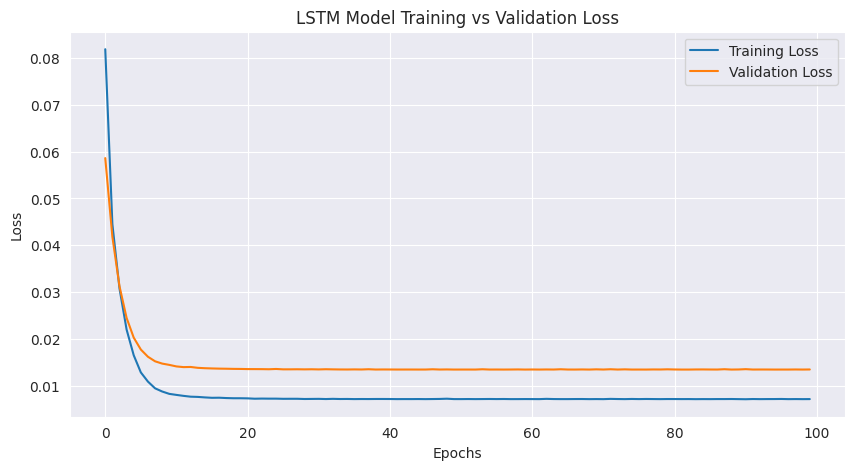

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Model Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
# Predict residuals on test data
predicted_residuals = model.predict(X_test)

predicted_residuals = scaler.inverse_transform(predicted_residuals)

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


In [ ]:
# Extracting ARIMA predictions
arima_predictions = arima_result.predict(start=len(merged_data)-len(y_test), end=len(merged_data)-1)

In [ ]:
# Final Hybrid Model = ARIMA Trend + LSTM Residuals
final_predictions = arima_predictions + predicted_residuals.flatten()

In [ ]:
# Ensure all columns have the same length
min_length = min(
    len(merged_data['Date'].iloc[-len(y_test):].values),
    len(merged_data[f'{stock_ticker}_Close'].iloc[-len(y_test):].values),
    len(arima_predictions),
    len(final_predictions)
)
comparison_df = pd.DataFrame({
    'Date': merged_data['Date'].iloc[-min_length:].values.flatten(),
    'Actual Price': merged_data[f'{stock_ticker}_Close'].iloc[-min_length:].values.flatten(),
    'ARIMA Prediction': np.ravel(arima_predictions[-min_length:]),  # Convert to 1D
    'Final Hybrid Prediction': np.ravel(final_predictions[-min_length:])  # Convert to 1D
})
comparison_df.head()


,Date,Actual Price,ARIMA Prediction,Final Hybrid Prediction
0,2023-02-15,1114.610840,1089.373655,1090.356188
1,2023-02-16,1113.740112,1114.556246,1115.538780
2,2023-02-17,1118.391968,1113.802140,1114.784673
3,2023-02-20,1106.567383,1118.246500,1119.229033
4,2023-02-21,1115.596313,1106.927272,1107.909805


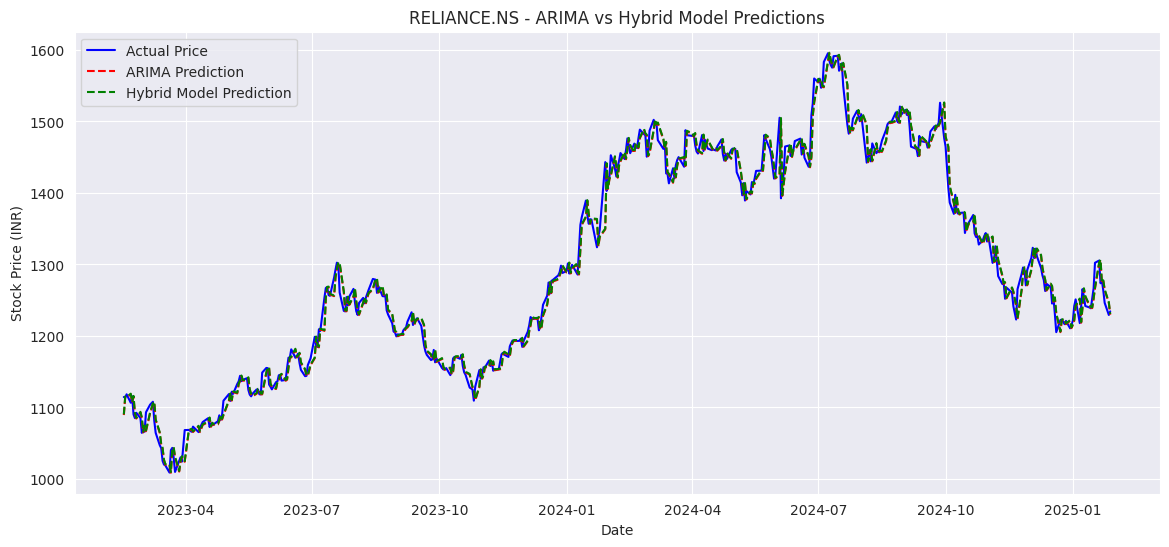

In [ ]:
plt.figure(figsize=(14,6))
plt.plot(comparison_df['Date'], comparison_df['Actual Price'], label="Actual Price", color="blue")
plt.plot(comparison_df['Date'], comparison_df['ARIMA Prediction'], label="ARIMA Prediction", linestyle="dashed", color="red")
plt.plot(comparison_df['Date'], comparison_df['Final Hybrid Prediction'], label="Hybrid Model Prediction", linestyle="dashed", color="green")
plt.xlabel("Date")
plt.ylabel("Stock Price (INR)")
plt.title(f"{stock_ticker} - ARIMA vs Hybrid Model Predictions")
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

# Compute evaluation metrics
mape_arima = mean_absolute_percentage_error(comparison_df['Actual Price'], comparison_df['ARIMA Prediction'])
mape_hybrid = mean_absolute_percentage_error(comparison_df['Actual Price'], comparison_df['Final Hybrid Prediction'])

rmse_arima = np.sqrt(mean_squared_error(comparison_df['Actual Price'], comparison_df['ARIMA Prediction']))
rmse_hybrid = np.sqrt(mean_squared_error(comparison_df['Actual Price'], comparison_df['Final Hybrid Prediction']))

print(f"ARIMA MAPE: {mape_arima:.4f}, RMSE: {rmse_arima:.2f}")
print(f"Hybrid Model MAPE: {mape_hybrid:.4f}, RMSE: {rmse_hybrid:.2f}")


ARIMA MAPE: 0.0094, RMSE: 17.22
Hybrid Model MAPE: 0.0094, RMSE: 17.23


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

#  MAPE
mape_arima = mean_absolute_percentage_error(comparison_df['Actual Price'], comparison_df['ARIMA Prediction'])
mape_hybrid = mean_absolute_percentage_error(comparison_df['Actual Price'], comparison_df['Final Hybrid Prediction'])

# RMSE
rmse_arima = np.sqrt(mean_squared_error(comparison_df['Actual Price'], comparison_df['ARIMA Prediction']))
rmse_hybrid = np.sqrt(mean_squared_error(comparison_df['Actual Price'], comparison_df['Final Hybrid Prediction']))

# MASE (Mean Absolute Scaled Error)
def mase(y_actual, y_pred, y_naive):
    naive_mae = np.mean(np.abs(y_actual[:-1] - y_naive[1:]))
    model_mae = np.mean(np.abs(y_actual - y_pred))
    return model_mae / naive_mae

mase_arima = mase(comparison_df['Actual Price'], comparison_df['ARIMA Prediction'], comparison_df['Actual Price'])
mase_hybrid = mase(comparison_df['Actual Price'], comparison_df['Final Hybrid Prediction'], comparison_df['Actual Price'])

eval_results = pd.DataFrame({
    "Model": ["ARIMA", "Hybrid (ARIMA+LSTM)"],
    "MAPE": [mape_arima, mape_hybrid],
    "RMSE": [rmse_arima, rmse_hybrid],
    "MASE": [mase_arima, mase_hybrid]
})


<ipython-input-45-9df64a7fedb9>:15: RuntimeWarning: divide by zero encountered in scalar divide
  return model_mae / naive_mae
<ipython-input-45-9df64a7fedb9>:15: RuntimeWarning: divide by zero encountered in scalar divide
  return model_mae / naive_mae


In [ ]:
# Forecast ARIMA Trend Component for the next 30 days
future_steps = 30
future_arima_predictions = arima_result.forecast(steps=future_steps)


In [ ]:
# Prepare last 'lookback' days for input into LSTM
last_residuals = merged_data['ARIMA_Residuals_Scaled'].values[-lookback:].reshape(1, lookback, 1)

# Generate future residual predictions using LSTM
future_lstm_predictions = []

for _ in range(future_steps):
    pred = model.predict(last_residuals, verbose=0)[0][0]
    future_lstm_predictions.append(pred)

    last_residuals = np.roll(last_residuals, -1)
    last_residuals[0, -1, 0] = pred

future_lstm_predictions = scaler.inverse_transform(np.array(future_lstm_predictions).reshape(-1,1)).flatten()


In [ ]:
future_hybrid_predictions = future_arima_predictions + future_lstm_predictions

future_dates = pd.date_range(start=comparison_df['Date'].iloc[-1], periods=future_steps+1, freq='B')[1:]

future_df = pd.DataFrame({
    'Date': future_dates,
    'ARIMA Prediction': future_arima_predictions,
    'Hybrid Model Prediction': future_hybrid_predictions
})

print(future_df.head())


           Date  ARIMA Prediction  Hybrid Model Prediction
2459 2025-01-29       1233.999319              1234.981853
2460 2025-01-30       1234.331935              1235.314469
2461 2025-01-31       1234.055838              1235.038372
2462 2025-02-03       1234.285020              1235.267554
2463 2025-02-04       1234.094782              1235.077315
